# Gradient Boosting Machines

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### DATASET

In [3]:
df = pd.read_csv("C://Users//ertug//Desktop//Machine_Learning_Courses//_3_Classification//diabetes.csv//diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
y = df["Outcome"]

In [6]:
X = df.drop(["Outcome"], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=.3,
                                                    random_state=42)

### Model & Training

In [8]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [17]:
dir(gbm_model)

['_SUPPORTED_LOSS',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_initialized',
 '_check_n_features',
 '_check_params',
 '_clear_state',
 '_compute_partial_dependence_recursion',
 '_estimator_type',
 '_fit_stage',
 '_fit_stages',
 '_get_param_names',
 '_get_tags',
 '_init_state',
 '_is_initialized',
 '_make_estimator',
 '_more_tags',
 '_raw_predict',
 '_raw_predict_init',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_resize_state',
 '_rng',
 '_staged_raw_predict',
 '_validate_data',
 '_va

In [19]:
?gbm_model #  loss --> gerçek değerler ile tahmin edilen değerler arasındaki farkın nasıl optimize edileceğinini inceler.
           #  learning_rate --> öğrenme oranıdır. learning_rate ile n_estimators arasında bir ilişki mevcuttur.
           #  n_estimators --> kullanılacak olan ağaç sayısıdır. --> rassallığı sağlıyor.
           #  criterion --> bölünmeleri ayarlayabilmek için belirli kriterler kullanılır 
           #  min_samples_split --> bölünme için gerekli olan minimum örnek sayısını ifade ediyor.

Object `gbm_model #  loss --> gerçek değerler ile tahmin edilen değerler arasındaki farkın nasıl optimize edileceğinini inceler.` not found.


In [9]:
y_pred = gbm_model.predict(X_test)

In [10]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.5010810823432182

In [11]:
accuracy_score(y_test, y_pred)

0.7489177489177489

In [12]:
r2_score(y_test, y_pred)

-0.10910596026490094

In [13]:
confusion_matrix(y_test, y_pred)

array([[120,  31],
       [ 27,  53]], dtype=int64)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.63      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



In [15]:
gbm_model.predict_proba(X_test)

array([[0.33642461, 0.66357539],
       [0.83853585, 0.16146415],
       [0.89128753, 0.10871247],
       [0.76567626, 0.23432374],
       [0.61745974, 0.38254026],
       [0.23770705, 0.76229295],
       [0.99028205, 0.00971795],
       [0.1284156 , 0.8715844 ],
       [0.62036984, 0.37963016],
       [0.48853852, 0.51146148],
       [0.85317867, 0.14682133],
       [0.07637002, 0.92362998],
       [0.77366088, 0.22633912],
       [0.73022905, 0.26977095],
       [0.97226676, 0.02773324],
       [0.57462907, 0.42537093],
       [0.94266404, 0.05733596],
       [0.98625689, 0.01374311],
       [0.07512311, 0.92487689],
       [0.52178194, 0.47821806],
       [0.66812762, 0.33187238],
       [0.94979389, 0.05020611],
       [0.65277411, 0.34722589],
       [0.98200284, 0.01799716],
       [0.39951102, 0.60048898],
       [0.04349328, 0.95650672],
       [0.94777864, 0.05222136],
       [0.97696141, 0.02303859],
       [0.96205834, 0.03794166],
       [0.85669346, 0.14330654],
       [0.

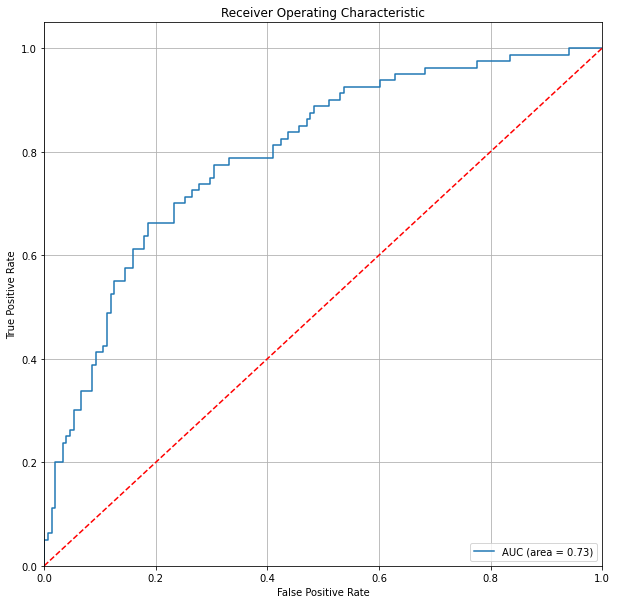

In [16]:
logit_roc_auc = roc_auc_score(y_test, gbm_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gbm_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC (area = %.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([.0, 1.0])
plt.ylim([.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("GBM_ROC")
plt.grid(1)
plt.show()

### MODEL TUNING

In [21]:
gbm_model = GradientBoostingClassifier()

In [22]:
gbm_params = {"learning_rate": [.1, .01, .001, .0001, .00001],
              "n_estimators": [100, 300, 500, 1000],
              "min_samples_split": [3, 5, 7, 8]}

In [23]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv=10, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  9.7min finished


In [24]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'min_samples_split': 7, 'n_estimators': 500}

In [25]:
gbm_cv_model.best_score_

0.7801537386443046

In [26]:
gbm_tuned = GradientBoostingClassifier(learning_rate=gbm_cv_model.best_params_.get("learning_rate"),
                                       n_estimators=gbm_cv_model.best_params_.get("n_estimators"),
                                       min_samples_split=gbm_cv_model.best_params_.get("min_samples_split"),).fit(X_train,
                                                                                                                  y_train)

In [27]:
y_pred = gbm_tuned.predict(X_test)

In [28]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.5010810823432182

In [29]:
accuracy_score(y_test, y_pred)

0.7489177489177489

In [30]:
r2_score(y_test, y_pred)

-0.10910596026490094

In [31]:
confusion_matrix(y_test, y_pred)

array([[120,  31],
       [ 27,  53]], dtype=int64)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.63      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



In [33]:
gbm_tuned.predict_proba(X_test)

array([[0.39829527, 0.60170473],
       [0.82388611, 0.17611389],
       [0.91239747, 0.08760253],
       [0.76749708, 0.23250292],
       [0.54758829, 0.45241171],
       [0.33845164, 0.66154836],
       [0.97053388, 0.02946612],
       [0.26683176, 0.73316824],
       [0.52397555, 0.47602445],
       [0.39441553, 0.60558447],
       [0.77162959, 0.22837041],
       [0.10220552, 0.89779448],
       [0.65890764, 0.34109236],
       [0.7152354 , 0.2847646 ],
       [0.94886957, 0.05113043],
       [0.61573672, 0.38426328],
       [0.92906819, 0.07093181],
       [0.96258716, 0.03741284],
       [0.16820164, 0.83179836],
       [0.49309467, 0.50690533],
       [0.67646521, 0.32353479],
       [0.92023437, 0.07976563],
       [0.59911306, 0.40088694],
       [0.96169984, 0.03830016],
       [0.46534967, 0.53465033],
       [0.07782129, 0.92217871],
       [0.93969576, 0.06030424],
       [0.95597805, 0.04402195],
       [0.92475429, 0.07524571],
       [0.80115684, 0.19884316],
       [0.

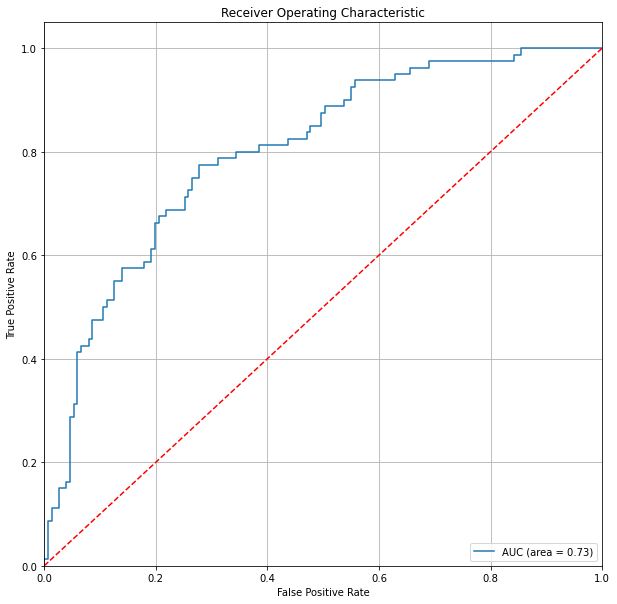

In [34]:
logit_roc_auc = roc_auc_score(y_test, gbm_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gbm_tuned.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC (area = %.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([.0, 1.0])
plt.ylim([.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("GBM_ROC")
plt.grid(1)
plt.show()

In [36]:
gbm_tuned.feature_importances_

array([0.02633569, 0.48075185, 0.01556919, 0.00771271, 0.04015497,
       0.19387032, 0.07976282, 0.15584245])

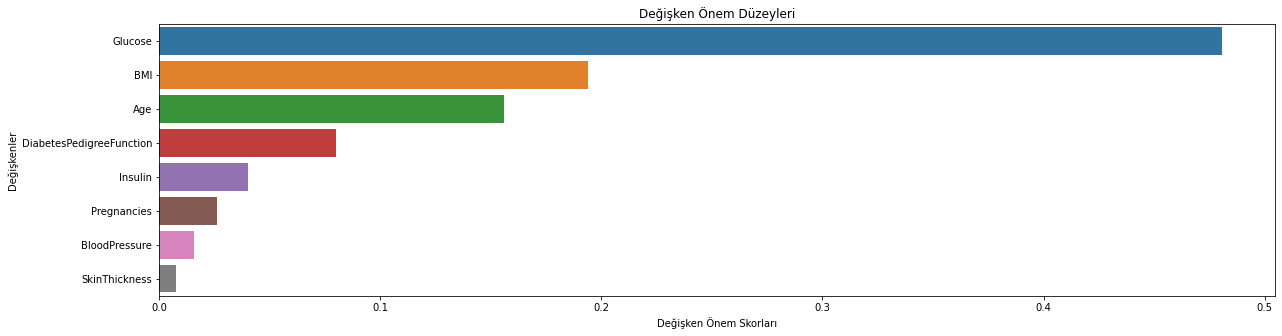

In [37]:
feature_imp = pd.Series(gbm_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri");